In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("C:\\Users\\Surin\\Downloads\\fifa_eda.csv\\fifa_eda.csv")
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [4]:
df.head(1)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0


In [5]:
df.describe

<bound method NDFrame.describe of            ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club     Value   Wage Preferred Foot  \
0             F

In [7]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [8]:
# Analysis of Values by Ages

<BarContainer object of 29 artists>

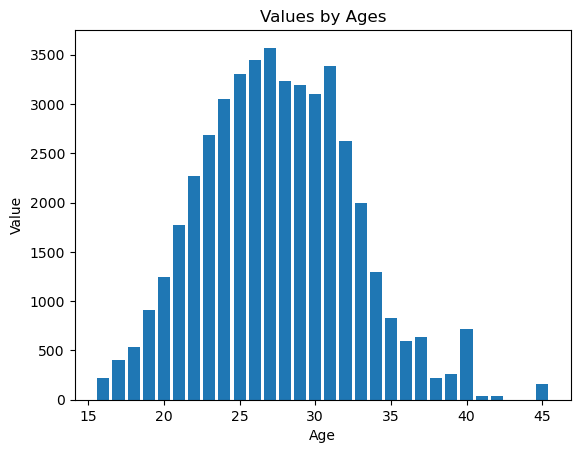

In [9]:
ages = sorted(df["Age"].unique()) 
values = [df[df["Age"] == age]["Value"].mean() for age in ages]
plt.title("Values by Ages")
plt.xlabel("Age")
plt.ylabel("Value")
plt.bar(ages, values)

In [10]:
# Analysis of Teams by their Height average

In [11]:
# Extracting the valid clubs and check if any left
valid_clubs_df = df[df["Club"].notna()]
clubs = valid_clubs_df["Club"].unique()
print("Length of the valid clubs:", len(clubs), "\nTotal nan value of the clubs:", pd.isna(clubs).sum()) 

Length of the valid clubs: 651 
Total nan value of the clubs: 0


In [12]:
# Extracting the valid clubs and check if any left
heights = np.array([df[df["Club"] == club]["Height"].mean() for club in clubs])
print("Length of the valid heights:", len(heights), "\nTotal nan value of the heights:", np.isnan(heights).sum()) 

Length of the valid heights: 651 
Total nan value of the heights: 0


In [13]:
# Sorting the clubs and their heights
sorted_indices = np.argsort(heights)
heights = heights[sorted_indices]
clubs = clubs[sorted_indices]

top_heights = heights[-5:]
tallest_clubs = clubs[-5:]
print("Top 5 clubs according to player's height:", tallest_clubs, "\nTheir heights:", top_heights)

Top 5 clubs according to player's height: ['FC Midtjylland' ' SSV Jahn Regensburg' 'Holstein Kiel' 'SPAL'
 'AC Horsens'] 
Their heights: [6.07407407 6.08045977 6.08333333 6.08641975 6.12      ]


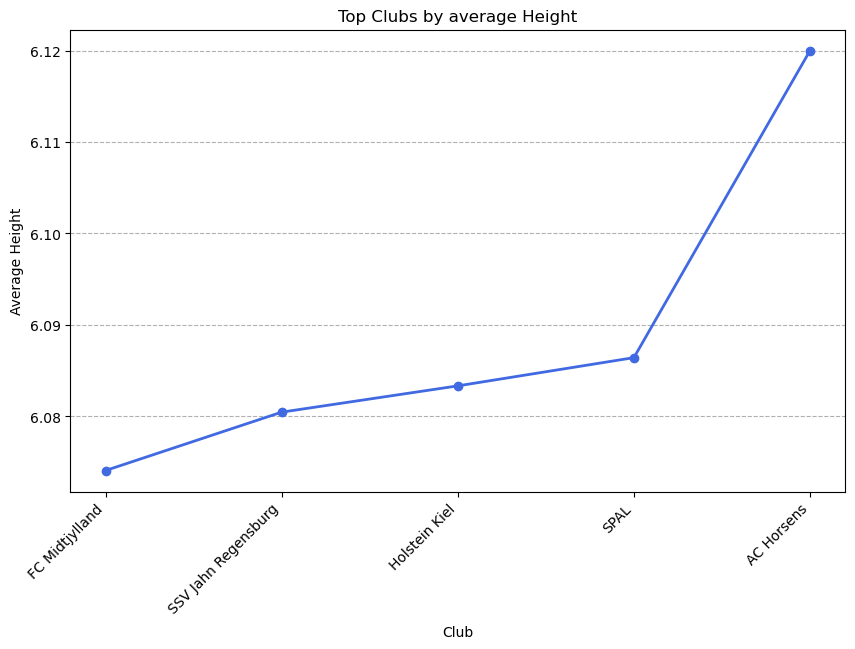

In [14]:
# Visualizing the top 5 Clubs according to player's height
plt.figure(figsize=(10, 6))
plt.plot(tallest_clubs, top_heights, marker="o", linestyle="-", linewidth=2, color="royalblue")

plt.title("Top Clubs by average Height")
plt.xlabel("Club")
plt.ylabel("Average Height")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--")
plt.show()